In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *
from matplotlib import pyplot as plt
import itertools #스피어만 상관계수

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [20]:
df1=pd.read_csv('../매출액,금리,환율/금리,환율_전처리.csv',encoding='euc-kr',index_col='일자')
df2=pd.read_csv('../매출액,금리,환율/당기순익_merge.csv',encoding='euc-kr',index_col='결산년도')
df3=pd.read_csv('../주가데이터/DATA_FILE/kb금융.csv')
df3

,date,open,high,low,close,volume
0,20210813,53800,53800,52200,53200,1382277
1,20210812,54000,54000,53100,53400,1578901
2,20210811,52600,53600,52500,53600,1802909
3,20210810,53200,53200,52100,52300,1162055
4,20210809,52600,53200,52500,53000,1879902
...,...,...,...,...,...,...
3174,20081016,44618,44912,42419,42419,4032208
3175,20081015,49065,50141,48577,49847,2918014
3176,20081014,52780,54734,50629,51900,4049071
3177,20081013,47062,50336,45498,49554,3254127


<Figure size 720x432 with 0 Axes>

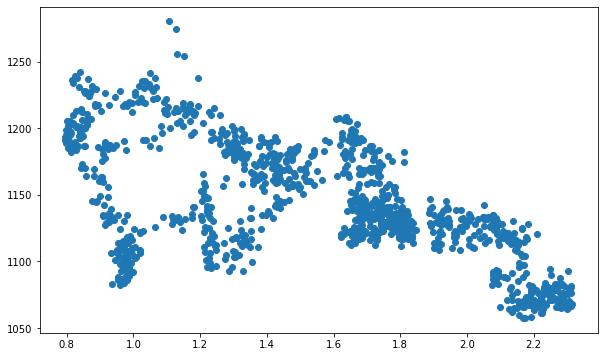

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df1['금리'],df1['달러환율'])

In [5]:
pearsonr(df1['금리'],df1['달러환율']) # 금리와 달러환율의 피어슨상관계수= -0.6
# p-value는 0에 수렴하므로 금리와 달려환율은 음의 상관관계를 갖는다

(-0.602283516878658, 1.6158918521604554e-116)

In [6]:
spearmanr(df1['금리'],df1['달러환율'])# 금리와 달러환율의 스피어만상관계수= -0.58
# p-value는 0에 수렴하므로 금리와 달려환율은 음의 상관관계를 갖는다

SpearmanrResult(correlation=-0.5761107543441976, pvalue=1.6794323292634816e-104)

In [19]:
total=0
len1=0
for i in range(2016,2022):
    for n in range(len(df1.index)):
        if df1.index[n][0:4]==str(i):
            if df1.index[n][5:7] in ['01','02','03']:
                total += df1['금리'][n]
                len1 += 1
    if len1!=0:
        print(i,'년 1분기 평균 금리 : ',total/len1)
    else:
        print(i,'년 1분기는 데이터가 없습니다')
    total=0

2016 년 1분기는 데이터가 없습니다
2017 년 1분기 평균 금리 :  1.6735967741935485
2018 년 1분기 평균 금리 :  1.1125203252032525
2019 년 1분기 평균 금리 :  0.5833131868131869
2020 년 1분기 평균 금리 :  0.31356147540983603
2021 년 1분기 평균 금리 :  0.20504934210526327


In [29]:
df1.index[0][5:7]

'07'

In [31]:
df1.index[0][0:4]

'2016'

In [42]:
range(len(df1.index))

TypeError: 'int' object is not callable